In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
import os

def load_data_from_folder(folder_path):
    all_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

train_folder = 'final/train_db4'
test_folder = 'final/test_db4'

# Load training and testing data
train_data = load_data_from_folder(train_folder)
test_data = load_data_from_folder(test_folder)

# Define input and output features
X_train = train_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_train = train_data['vinn']
X_test = test_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
y_test = test_data['vinn']


In [15]:
print(X_train.shape, 'X_train')
print(X_test.shape, 'X_test')
print(y_test.shape, 'y_test')
print(y_train.shape, 'y_train')

(2085000, 7) X_train
(15000, 1, 7) X_test
(15000,) y_test
(2085000,) y_train


In [17]:
X_train = np.expand_dims(X_train.values, axis=1)  
print(X_train.shape, 'X_train')
X_test = np.expand_dims(X_test.values, axis=1)
print(X_test.shape, 'X_test')


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [5]:
# Define the LSTM model for time-domain prediction
lstm_model = Sequential([
    # First LSTM layer with 32 units and ReLU activation, returning sequences
    LSTM(32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    # Second LSTM layer with 32 units and ReLU activation, not returning sequences
    LSTM(32, activation='relu', return_sequences=False),
    # Dense layer with 256 units and Tanh activation
    Dense(256, activation='tanh'),
    # Final dense layer with 1 unit and linear activation for continuous output
    Dense(1, activation='linear')
])

# Compile the model with Adam optimizer and MSE loss function
lstm_model.compile(optimizer='adam', loss='mse')

# Summary of the model (optional, for visualization)
lstm_model.summary()


c:\Users\admin\miniforge3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 32)          │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,145 (86.50 KB)

 Trainable params: 22,145 (86.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, activation='relu', return_sequences=False),
    Dense(256, activation='tanh'),
    Dense(1,activation='linear')  
])
    
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()


c:\Users\admin\miniforge3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,353 (267.00 KB)

 Trainable params: 68,353 (267.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(256, activation='relu'),
    Dense(1)  
])
    
lstm_model.compile(optimizer='adam', loss='mse')


In [7]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,353 (267.00 KB)

 Trainable params: 68,353 (267.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Verify GPU usage
if tf.config.list_physical_devices('GPU'):
    print("Running on GPU!")
else:
    print("Running on CPU. Check your TensorFlow installation or environment.")

In [ ]:
log_file = "training_log.csv"
csv_logger = CSVLogger(log_file, append=False)

history = lstm_model.fit(
    X_train, y_train,
    epochs=7,
    batch_size=16,
    validation_split=0.15,
    verbose=1,
    callbacks=[csv_logger]
)

model_path = "lstm_model.h5"
lstm_model.save(model_path)
print(f"Model saved to {model_path}")



In [22]:
# Resave in the Keras format
lstm_model.save("lstm_model.keras")


In [19]:
y_pred = lstm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LSTM Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
LSTM Regression Metrics:
Mean Squared Error (MSE): 0.024941518122250303
Mean Absolute Error (MAE): 0.08753914726409072
R-squared (R2): 0.9457812963110798


In [1]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Load the model (Keras format .keras)
loaded_model = load_model("lstm_model.keras", compile=False)  
loaded_model.compile(optimizer='adam', loss='mean_squared_error')  
# print("Model loaded from lstm_model.keras")


def load_and_prepare_test_file(file_path):
    test_data = pd.read_csv(file_path)
    X_test = test_data[['vinp', 'pd', 'xpd', 'vdd', 'process', 'voltage', 'temperature']]
    y_test = test_data['vinn']
    X_test = np.expand_dims(X_test.values, axis=1)  
    return X_test, y_test


test_file = 'final/test_db4/fastnfastp_3.6V_45_db4.csv'  

X_test, y_test = load_and_prepare_test_file(test_file)

# 
y_pred = loaded_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Comparison of Predicted vs Actual vinn for the test case:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Comparison of Predicted vs Actual vinn for the test case:
Mean Squared Error (MSE): 0.004813900017374094
Mean Absolute Error (MAE): 0.04192532537732426
R-squared (R2): 0.9892054778258464


In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))


plt.plot(y_test.values, label='Actual vinn', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted vinn', color='red', alpha=0.7)


plt.xlabel('Index')
plt.ylabel('Vinn')
plt.title('Comparison of Actual and Predicted Vinn')

plt.legend()


plt.show()


Signal-to-Noise Ratio (SNR): 28.54 dB


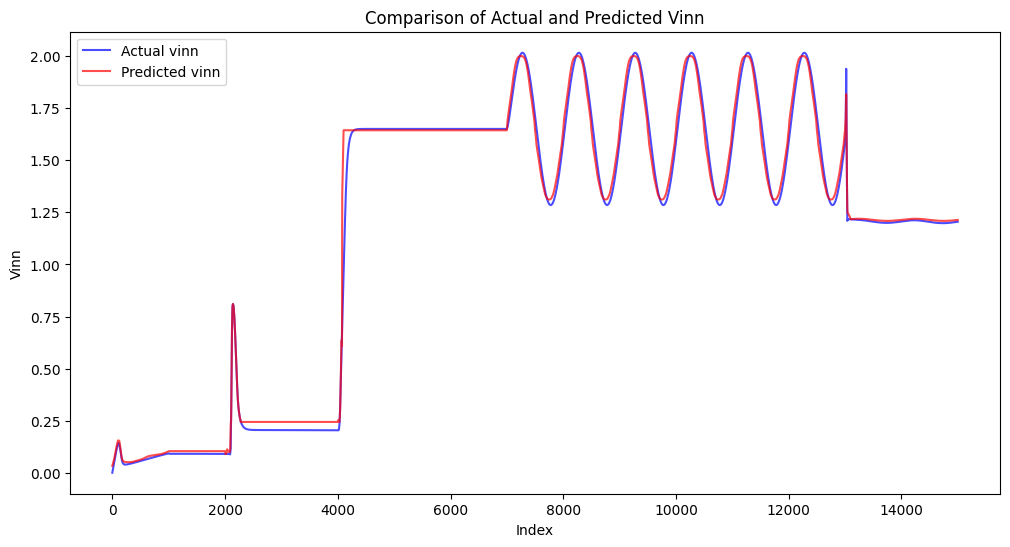

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'lstm_predictions.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Assuming the CSV has two columns: 'Column1' and 'Column2'
x = data['Original']  # Replace 'Column1' with the actual column name for the x-axis
y = data['Predicted']  # Replace 'Column2' with the actual column name for the y-axis

signal_power = np.mean(x**2)
noise_power = np.mean((x - y)**2)

# Calculate SNR in decibels (dB)
snr = 10 * np.log10(signal_power / noise_power)

print(f"Signal-to-Noise Ratio (SNR): {snr:.2f} dB")

plt.figure(figsize=(12, 6))


plt.plot(x, label='Actual vinn', color='blue', alpha=0.7)
plt.plot(y, label='Predicted vinn', color='red', alpha=0.7)


plt.xlabel('Index')
plt.ylabel('Vinn')
plt.title('Comparison of Actual and Predicted Vinn')

plt.legend()


plt.show()


